In [38]:
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import pandas_ta as ta
import numpy as np
from tqdm import tqdm
import numpy as np
from datetime import datetime

warnings.filterwarnings('ignore')

In [39]:
import os
import sys
import pandas as pd
sys.path.append("..")
from function import cryptopen

In [40]:
path = "../../btc_usd_1d.pkl"
df = cryptopen.cryptopen(path)
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2017-01-01,966.34,1005.00,960.53,998.80,6.579904e+06
2017-01-02,997.75,1032.00,990.01,1014.10,8.190255e+06
2017-01-03,1011.44,1039.00,999.99,1036.99,8.955193e+06
2017-01-04,1035.51,1139.89,1028.56,1122.56,2.325716e+07
2017-01-05,1114.38,1136.72,885.41,994.02,3.503690e+07
...,...,...,...,...,...
2022-05-12,29077.90,30257.00,26631.00,29020.70,9.644756e+05
2022-05-13,29020.80,31072.60,28730.40,29274.30,5.076201e+05
2022-05-14,29274.20,30352.20,28602.30,30079.80,3.157569e+05


In [41]:
adx = df.ta.adx()
macd = df.ta.macd(fast=14, slow=24)
rsi = df.ta.rsi()
df = pd.concat([df, adx, macd, rsi], axis=1)
df

,Open,High,Low,Close,Volume,ADX_14,DMP_14,DMN_14,MACD_14_24_9,MACDh_14_24_9,MACDs_14_24_9,RSI_14
Datetime,,,,,,,,,,,,
2017-01-01,966.34,1005.00,960.53,998.80,6.579904e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,997.75,1032.00,990.01,1014.10,8.190255e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,1011.44,1039.00,999.99,1036.99,8.955193e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,1035.51,1139.89,1028.56,1122.56,2.325716e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,1114.38,1136.72,885.41,994.02,3.503690e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,29077.90,30257.00,26631.00,29020.70,9.644756e+05,39.118388,6.284914,34.583110,-1976.021249,-604.372597,-1371.648652,25.587567
2022-05-13,29020.80,31072.60,28730.40,29274.30,5.076201e+05,40.530964,8.311274,32.127431,-2075.730249,-563.265278,-1512.464971,26.798228
2022-05-14,29274.20,30352.20,28602.30,30079.80,3.157569e+05,41.872698,7.862095,30.786747,-2090.130436,-462.132372,-1627.998064,30.657265


In [42]:
predict_df = df
predict_df['target'] = predict_df['Close'].shift(-1)
predict_df = predict_df[:-1]

In [43]:
#결측치 처리
predict_df2 = predict_df.dropna(axis=1, how='all')
predict_df3 = predict_df2.interpolate(method='values')
predict_df4 = predict_df3.dropna(axis=0, how='any')
predict_df5 = predict_df4.drop(['High', 'Low'], axis=1)

In [44]:
predict_df5

,Open,Close,Volume,ADX_14,DMP_14,DMN_14,MACD_14_24_9,MACDh_14_24_9,MACDs_14_24_9,RSI_14,target
Datetime,,,,,,,,,,,
2017-02-01,963.99,983.36,6.669710e+06,10.880661,30.906320,16.703404,5.558297,7.080748,-1.522451,63.112736,1008.18
2017-02-02,983.79,1008.18,8.158190e+06,13.368655,33.563232,15.365609,9.490826,8.810621,0.680204,66.642607,1012.64
2017-02-03,1009.15,1012.64,1.089936e+07,15.848354,33.362425,14.230577,12.762993,9.666231,3.096762,67.249096,1034.44
2017-02-04,1015.06,1034.44,5.857359e+06,18.550452,35.035841,13.057720,16.398528,10.641413,5.757115,70.109761,1014.57
2017-02-05,1033.72,1014.57,4.387548e+06,20.961909,32.867653,12.249645,18.062611,9.844397,8.218215,64.573412,1023.70
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,31002.10,29074.70,1.101876e+06,36.801119,7.060741,35.379679,-1807.569877,-587.014374,-1220.555502,25.671516,29020.70
2022-05-12,29077.90,29020.70,9.644756e+05,39.118388,6.284914,34.583110,-1976.021249,-604.372597,-1371.648652,25.587567,29274.30
2022-05-13,29020.80,29274.30,5.076201e+05,40.530964,8.311274,32.127431,-2075.730249,-563.265278,-1512.464971,26.798228,30079.80


In [45]:
from sklearn.model_selection import train_test_split
col_dict = predict_df5.columns

data = predict_df5[col_dict[:-1]]
target = predict_df5['target']
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

model = LinearRegression()
LR = model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

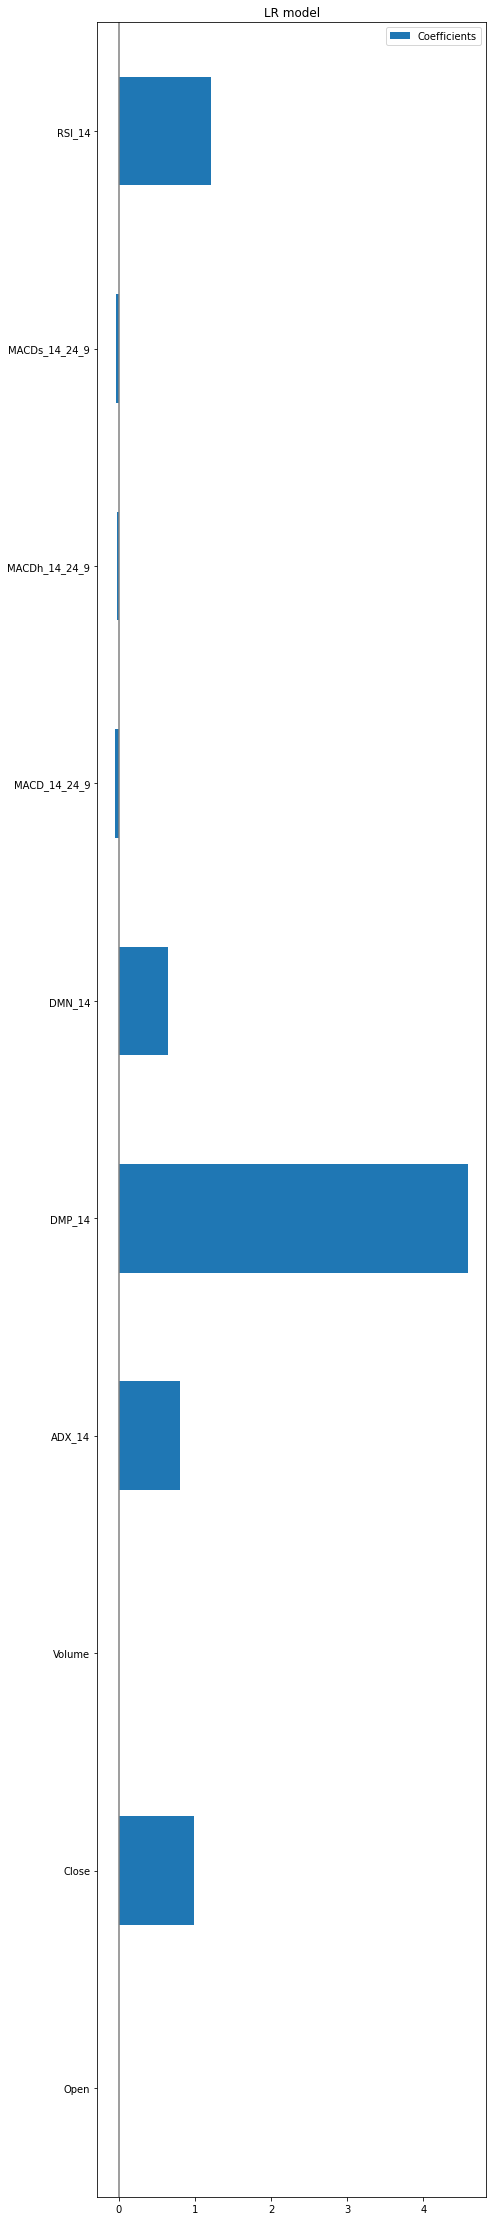

In [46]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [47]:
def backtest_ma(test_df):
    df = test_df.copy()
    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df

def backtest_noise(test_df,ori_df):
    noise_ma = 30
    ori_df=ori_df[['High','Low']]
    df = test_df.copy()
    df=pd.merge(df,ori_df,right_index=True,left_index=True)
    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df


def backtest_rsi(test_df):
    df = test_df.copy()
    df['rate'] = 1
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi
    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rsi_shift_1'] > 40), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, df['Close'] / df['Open'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df

def backtest_ma_and_noise(test_df,ori_df):
    noise_ma = 30
    ori_df=ori_df[['High','Low']]
    df = test_df.copy()
    df=pd.merge(df,ori_df,right_index=True,left_index=True)
    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()

    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])

    df['rate'] = df['rate'] / 10

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0), 1, 0)
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return df


def backtest_ma_and_rsi(test_df):
    df = test_df.copy()
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi

    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0) & (df['rsi_shift_1'] > 40), 1, 0)  # rsi가 40이상일 경우에만 거래 진행
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100

    return df

def backtest_noise_and_rsi(test_df,ori_df):
    noise_ma = 30
    ori_df=ori_df[['High','Low']]
    df = test_df.copy()
    df=pd.merge(df,ori_df,right_index=True,left_index=True)
    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi

    df['rate'] = 0
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 5

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0) & (df['rsi_shift_1'] > 40), 1, 0)  # rsi가 40이상일 경우에만 거래 진행
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100

    return df


def backtest_ma_and_rsi_and_noise(test_df,ori_df):
    noise_ma = 30
    ori_df=ori_df[['High','Low']]
    df = test_df.copy()
    df=pd.merge(df,ori_df,right_index=True,left_index=True)
    df['up'] = np.where(df['Close'].diff(1) > 0, df['Close'].diff(1), 0)
    df['down'] = np.where(df['Close'].diff(1) < 0, df['Close'].diff(1) * (-1), 0)
    df['au'] = df['up'].rolling(window=14, min_periods=14).mean()
    df['ad'] = df['down'].rolling(window=14, min_periods=14).mean()
    df['rsi'] = df['au'].div(df['ad'] + df['au']) * 100
    df['rsi_shift_1'] = df['rsi'].shift(1) # 하루 전의 rsi

    df['noise'] = 1 - abs(df['Open'] - df['Close']) / ((df['High']) * (1.0000001) - df['Low'])
    df['noise'] = df['noise'].shift(1)
    df['noise_ma'] = df['noise'].rolling(window=noise_ma).mean()
    df['ma5'] = df['Open'].rolling(window=5).mean()
    df['ma10'] = df['Open'].rolling(window=10).mean()
    df['ma20'] = df['Open'].rolling(window=20).mean()
    df['ma50'] = df['Open'].rolling(window=50).mean()
    df['ma100'] = df['Open'].rolling(window=100).mean()

    df['rate'] = 0
    df['rate'] = np.where(df['ma5'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma10'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma20'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma50'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['ma100'] < df['Open'], df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.3, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.4, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.5, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.6, df['rate'] + 1, df['rate'])
    df['rate'] = np.where(df['noise_ma'] < 0.7, df['rate'] + 1, df['rate'])
    df['rate'] = df['rate'] / 10

    df['trade'] = np.where((df['Open'] < df['prediction_close']) & (df['rate'] > 0) & (df['rsi_shift_1'] > 40), 1, 0)  # rsi가 40이상일 경우에만 거래 진행
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100

    return df        

In [48]:
diff = np.mean(np.abs(LR.predict(x_valid)-y_valid)/y_valid)
diff

0.029175151963484924

In [49]:
def batch(iterable, batch_size, pt):
    """
    batch row 생성 이터레이터
    Args:
        iterable: iterable datastructure
        batch_size:
        pt: prediction term 예측 기간
    Returns:
        yield: batch row
    """

    l = len(iterable)
    for idx, ndx in tqdm(enumerate(range(0, l, pt))):
        yield idx, iterable[ndx: min(ndx + batch_size, l)]


def backtest_LR_1d(test_df: pd.DataFrame, ft: int, pt: int, plot=True) -> pd.DataFrame:
    """

    Args:
        test_df: 1시간 봉 데이터
        ft: fitting term 피팅 시킬 기간
        pt: prediction term 예측 기간
        arima_params:
    Returns:
        df: 예측 값이 열로 포함된 DataFrame
    """
    df = test_df.copy()
    batch_size = ft + pt
    total_loop = int(len(df) / pt) - 1
    result_columns = list(df.columns)
    result_columns.append("prediction_close")

    result_df = pd.DataFrame(columns=result_columns)

    try:
        for idx, batch_df in batch(df, batch_size, pt):
            # print(f'{idx}/{total_loop} running loop...')
            train, test = batch_df[:ft-1], batch_df[ft-1:ft]
            X_train, y_train = train.drop('target',axis=1,inplace=False),train['target']
            X_test, y_test = test.drop('target',axis=1,inplace=False),test['target']
            LR = LinearRegression()
            LR.fit(X_train, y_train)
            pred = LR.predict(X_test)
            if len(pred) ==0:
                break
            row = batch_df.iloc[[-1]]
            row['prediction_close'] = pred
            row['batch_open'] = batch_df.iloc[ft].Open
            result_df = pd.concat([result_df, row], axis=0)

    except IndexError:
        pass
    result_df['trade'] = np.where(result_df['batch_open'] < result_df['prediction_close'], 1, 0)
    result_df['ror'] = np.where(result_df['trade'] == 1, result_df['Close'] / result_df['batch_open'], 1)
    result_df['cr'] = result_df['ror'].cumprod()
    result_df['mdd'] = (result_df['cr'].cummax() - result_df['cr']) / result_df['cr'].cummax() * 100

    if plot:
        plot_result(result_df)
        plot_return(result_df)

    return result_df

def plot_result(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(str(l[i])[:10],'%Y-%m-%d')
    plt.plot(l, df['Close'].values, color='b', label='real close')
    plt.plot(l, df['prediction_close'].values , color='r', label='prediction close')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_return(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(str(l[i])[:10],'%Y-%m-%d')
    plt.plot(l, df['cr'].values , color='r', label='return')
    plt.legend()
    plt.title(
        f"mdd: {round(df['mdd'].max(), 2)}\nreturn_rate: {round(df['cr'].iloc[-1] * 100 - 100, 2)}%")
    plt.grid(True)
    plt.show()

def analysis_return(test_df):
    # ror: 일일 수익률
    # trading_rate: 거래 확률
    # success_rate: 거래 성공 확률
    # pnl_rate: 손익비
    # mdd: 최대 손실 낙폭
    # cr: 누적 수익률

    df = test_df.copy()
    df['success'] = np.where((df['ror'] > 1) & (df['trade'] == 1), 1, 0)
    df['fail'] = np.where((df['ror'] < 1) & (df['trade'] == 1), 1, 0)
    df['success_ror'] = np.where(df['success'], (df['ror'] - 1) * 100, 0)
    df['fail_ror'] = np.where(df['fail'], (1 - df['ror']) * 100, 0)

    trade_rate = df['trade'].sum() / len(df)
    success_rate = df['success'].sum() / df['trade'].sum()
    pnl_rate = df['success_ror'].sum() / df['fail_ror'].sum()
    mdd = df['mdd'].max()
    cr = df['cr'].iloc[-1]

    return_dict = {}
    return_dict['trade_rate'] = f'{trade_rate * 100: .2f}%'
    return_dict['success_rate'] = f'{success_rate * 100: .2f}%'
    return_dict['pnl_rate'] = f'{pnl_rate: .2f}'
    return_dict['mdd'] = f'{mdd: .2f}%'
    return_dict['cr'] = f'{(cr - 1) * 100: .2f}%'

    return return_dict

def get_result_loss_1(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2021-05-10") & (df.index <= "2021-07-21")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

def get_result_loss_2(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2021-11-18") & (df.index <= "2022-02-06")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

def get_result_profit_1(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2019-02-17") & (df.index <= "2019-07-15")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

def get_result_profit_2(test_df):
    df = test_df.copy()
    df = df[(df.index >= "2020-10-08") & (df.index <= "2021-04-17")]
    df['ror'] = np.where(df['trade'] == 1, 1 + (df['Close'] / df['Open'] - 1) * df['rate'], 1)
    df['cr'] = df['ror'].cumprod()
    df['mdd'] = (df['cr'].cummax() - df['cr']) / df['cr'].cummax() * 100
    return analysis_return(df)

In [50]:
day50 = backtest_LR_1d(predict_df5, 50, 1, plot=False)
day100 = backtest_LR_1d(predict_df5, 100, 1, plot=False)
day200 = backtest_LR_1d(predict_df5, 200, 1, plot=False)
day300 = backtest_LR_1d(predict_df5, 300, 1, plot=False)
day500 = backtest_LR_1d(predict_df5, 500, 1, plot=False)

1880it [00:37, 50.20it/s]
1830it [00:36, 49.80it/s]
1730it [00:34, 50.02it/s]
1630it [00:32, 50.59it/s]
1430it [00:28, 50.71it/s]


In [51]:
print(analysis_return(day50))
print(analysis_return(day100))
print(analysis_return(day200))
print(analysis_return(day300))
print(analysis_return(day500))

{'trade_rate': ' 47.61%', 'success_rate': ' 52.29%', 'pnl_rate': ' 1.19', 'mdd': ' 70.33%', 'cr': ' 328.68%'}
{'trade_rate': ' 52.46%', 'success_rate': ' 52.40%', 'pnl_rate': ' 1.07', 'mdd': ' 82.28%', 'cr': ' 19.65%'}
{'trade_rate': ' 54.62%', 'success_rate': ' 52.38%', 'pnl_rate': ' 1.11', 'mdd': ' 75.68%', 'cr': ' 93.97%'}
{'trade_rate': ' 50.06%', 'success_rate': ' 51.96%', 'pnl_rate': ' 1.07', 'mdd': ' 70.13%', 'cr': '-3.87%'}
{'trade_rate': ' 52.31%', 'success_rate': ' 53.61%', 'pnl_rate': ' 1.21', 'mdd': ' 54.11%', 'cr': ' 284.36%'}


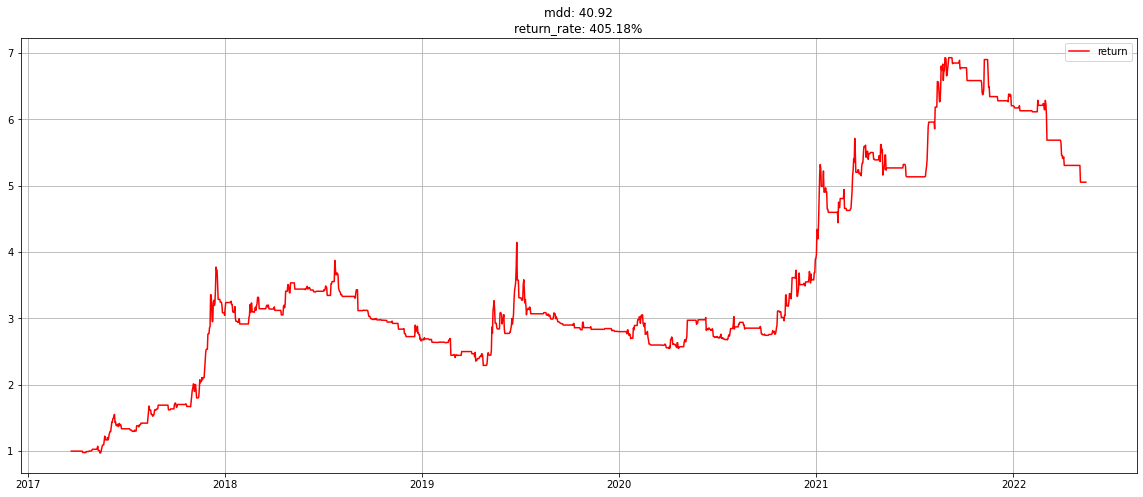

{'trade_rate': ' 8.22%', 'success_rate': ' 33.33%', 'pnl_rate': ' 0.21', 'mdd': ' 3.51%', 'cr': '-6.03%'}
{'trade_rate': ' 17.28%', 'success_rate': ' 21.43%', 'pnl_rate': ' 0.32', 'mdd': ' 4.18%', 'cr': '-5.82%'}
{'trade_rate': ' 51.01%', 'success_rate': ' 59.21%', 'pnl_rate': ' 1.24', 'mdd': ' 26.33%', 'cr': ' 18.79%'}
{'trade_rate': ' 52.60%', 'success_rate': ' 57.43%', 'pnl_rate': ' 1.78', 'mdd': ' 16.47%', 'cr': ' 95.74%'}


{'trade_rate': ' 38.88%',
 'success_rate': ' 51.85%',
 'pnl_rate': ' 1.31',
 'mdd': ' 40.92%',
 'cr': ' 405.18%'}

In [52]:
result_ma = backtest_ma(day50)
plot_return(result_ma)

print(get_result_loss_1(result_ma))
print(get_result_loss_2(result_ma))
print(get_result_profit_1(result_ma))
print(get_result_profit_2(result_ma))
analysis_return(result_ma)


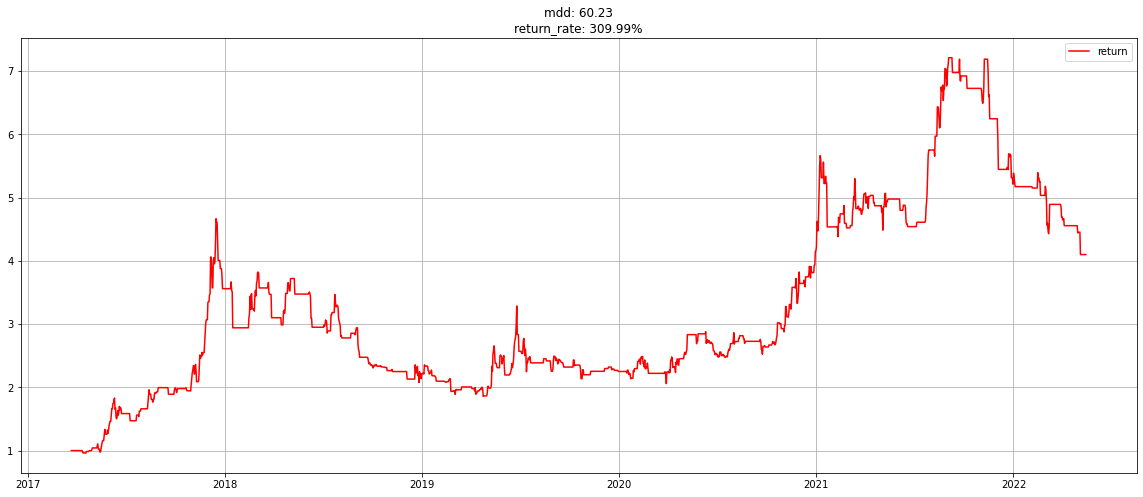

{'trade_rate': ' 15.07%', 'success_rate': ' 45.45%', 'pnl_rate': ' 0.39', 'mdd': ' 8.76%', 'cr': '-9.02%'}
{'trade_rate': ' 20.99%', 'success_rate': ' 23.53%', 'pnl_rate': ' 0.28', 'mdd': ' 17.53%', 'cr': '-22.25%'}
{'trade_rate': ' 51.01%', 'success_rate': ' 59.21%', 'pnl_rate': ' 1.19', 'mdd': ' 31.64%', 'cr': ' 14.49%'}
{'trade_rate': ' 49.48%', 'success_rate': ' 56.84%', 'pnl_rate': ' 1.64', 'mdd': ' 22.62%', 'cr': ' 84.33%'}


{'trade_rate': ' 36.91%',
 'success_rate': ' 52.02%',
 'pnl_rate': ' 1.22',
 'mdd': ' 60.23%',
 'cr': ' 309.99%'}

In [53]:
result_rsi = backtest_rsi(day50)
plot_return(result_rsi)

print(get_result_loss_1(result_rsi))
print(get_result_loss_2(result_rsi))
print(get_result_profit_1(result_rsi))
print(get_result_profit_2(result_rsi))
analysis_return(result_rsi)


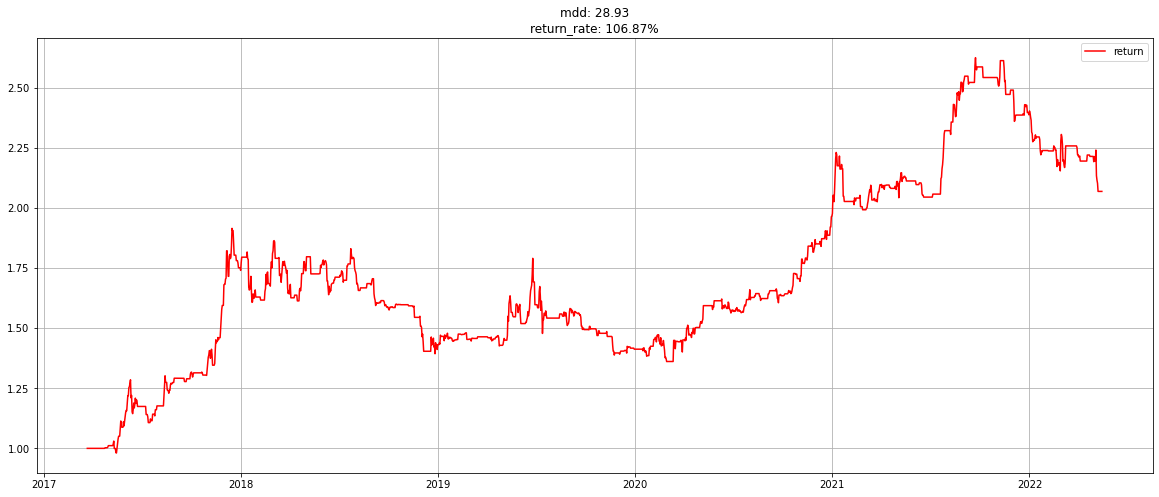

{'trade_rate': ' 19.18%', 'success_rate': ' 42.86%', 'pnl_rate': ' 0.83', 'mdd': ' 4.06%', 'cr': '-1.12%'}
{'trade_rate': ' 45.68%', 'success_rate': ' 40.54%', 'pnl_rate': ' 0.38', 'mdd': ' 10.81%', 'cr': '-11.58%'}
{'trade_rate': ' 51.01%', 'success_rate': ' 59.21%', 'pnl_rate': ' 1.12', 'mdd': ' 17.46%', 'cr': ' 4.14%'}
{'trade_rate': ' 52.60%', 'success_rate': ' 57.43%', 'pnl_rate': ' 1.70', 'mdd': ' 10.68%', 'cr': ' 26.95%'}


{'trade_rate': ' 47.29%',
 'success_rate': ' 52.31%',
 'pnl_rate': ' 1.19',
 'mdd': ' 28.93%',
 'cr': ' 106.87%'}

In [54]:
result_noise = backtest_noise(day50, df)
plot_return(result_noise)

print(get_result_loss_1(result_noise))
print(get_result_loss_2(result_noise))
print(get_result_profit_1(result_noise))
print(get_result_profit_2(result_noise))
analysis_return(result_noise)

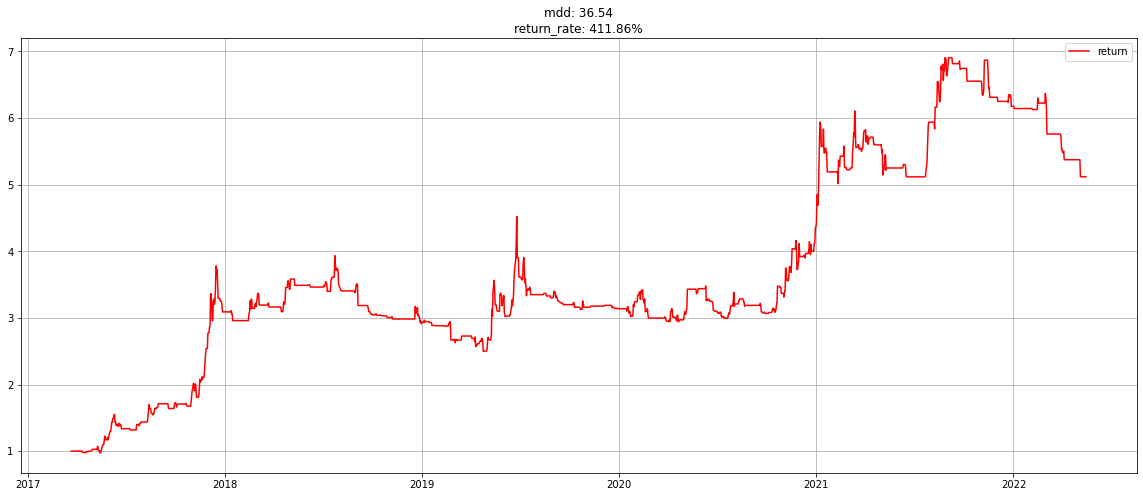

{'trade_rate': ' 8.22%', 'success_rate': ' 33.33%', 'pnl_rate': ' 0.21', 'mdd': ' 3.51%', 'cr': '-6.03%'}
{'trade_rate': ' 14.81%', 'success_rate': ' 16.67%', 'pnl_rate': ' 0.30', 'mdd': ' 3.50%', 'cr': '-5.16%'}
{'trade_rate': ' 51.01%', 'success_rate': ' 59.21%', 'pnl_rate': ' 1.24', 'mdd': ' 26.33%', 'cr': ' 18.79%'}
{'trade_rate': ' 49.48%', 'success_rate': ' 56.84%', 'pnl_rate': ' 1.71', 'mdd': ' 15.58%', 'cr': ' 81.98%'}


{'trade_rate': ' 34.26%',
 'success_rate': ' 52.17%',
 'pnl_rate': ' 1.34',
 'mdd': ' 36.54%',
 'cr': ' 411.86%'}

In [55]:
result_ma_rsi = backtest_ma_and_rsi(day50)
plot_return(result_ma_rsi)

print(get_result_loss_1(result_ma_rsi))
print(get_result_loss_2(result_ma_rsi))
print(get_result_profit_1(result_ma_rsi))
print(get_result_profit_2(result_ma_rsi))
analysis_return(result_ma_rsi)

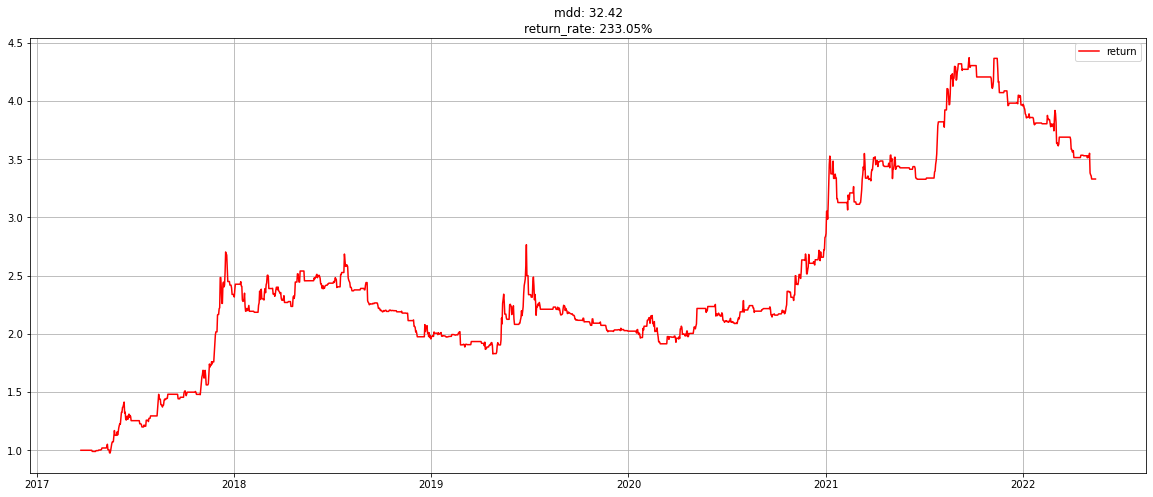

{'trade_rate': ' 19.18%', 'success_rate': ' 42.86%', 'pnl_rate': ' 0.49', 'mdd': ' 3.30%', 'cr': '-3.59%'}
{'trade_rate': ' 45.68%', 'success_rate': ' 40.54%', 'pnl_rate': ' 0.36', 'mdd': ' 7.13%', 'cr': '-8.71%'}
{'trade_rate': ' 51.01%', 'success_rate': ' 59.21%', 'pnl_rate': ' 1.20', 'mdd': ' 21.91%', 'cr': ' 11.95%'}
{'trade_rate': ' 52.60%', 'success_rate': ' 57.43%', 'pnl_rate': ' 1.76', 'mdd': ' 13.12%', 'cr': ' 58.65%'}


{'trade_rate': ' 47.61%',
 'success_rate': ' 52.29%',
 'pnl_rate': ' 1.26',
 'mdd': ' 32.42%',
 'cr': ' 233.05%'}

In [56]:
result_ma_noise = backtest_ma_and_noise(day50, df)
plot_return(result_ma_noise)

print(get_result_loss_1(result_ma_noise))
print(get_result_loss_2(result_ma_noise))
print(get_result_profit_1(result_ma_noise))
print(get_result_profit_2(result_ma_noise))
analysis_return(result_ma_noise)

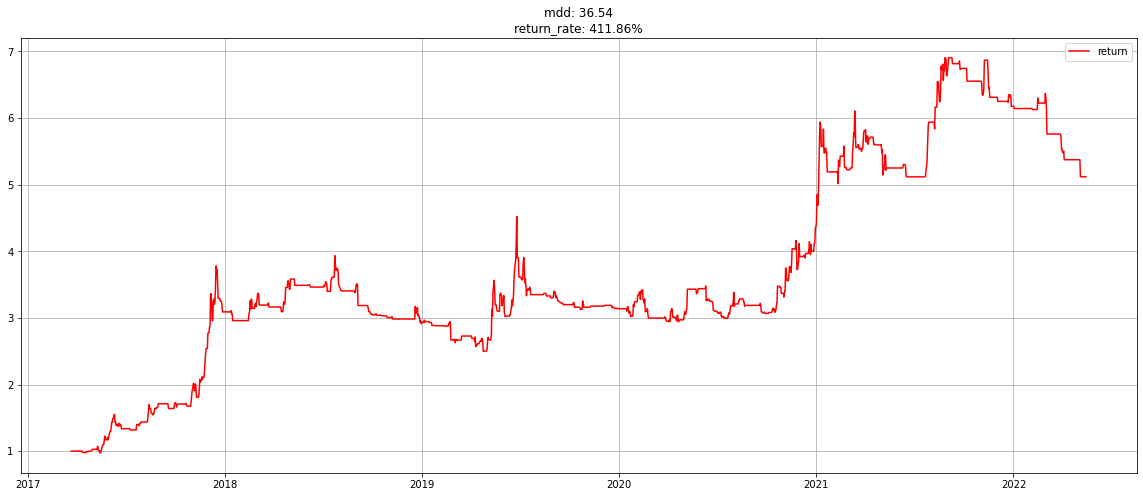

{'trade_rate': ' 15.07%', 'success_rate': ' 45.45%', 'pnl_rate': ' 0.37', 'mdd': ' 3.18%', 'cr': '-3.26%'}
{'trade_rate': ' 20.99%', 'success_rate': ' 23.53%', 'pnl_rate': ' 0.26', 'mdd': ' 6.15%', 'cr': '-8.30%'}
{'trade_rate': ' 51.01%', 'success_rate': ' 59.21%', 'pnl_rate': ' 1.12', 'mdd': ' 17.46%', 'cr': ' 4.14%'}
{'trade_rate': ' 49.48%', 'success_rate': ' 56.84%', 'pnl_rate': ' 1.67', 'mdd': ' 9.73%', 'cr': ' 24.64%'}


{'trade_rate': ' 36.60%',
 'success_rate': ' 52.03%',
 'pnl_rate': ' 1.23',
 'mdd': ' 22.37%',
 'cr': ' 102.93%'}

In [57]:
result_noise_rsi = backtest_noise_and_rsi(day50,df)
plot_return(result_ma_rsi)

print(get_result_loss_1(result_noise_rsi))
print(get_result_loss_2(result_noise_rsi))
print(get_result_profit_1(result_noise_rsi))
print(get_result_profit_2(result_noise_rsi))
analysis_return(result_noise_rsi)

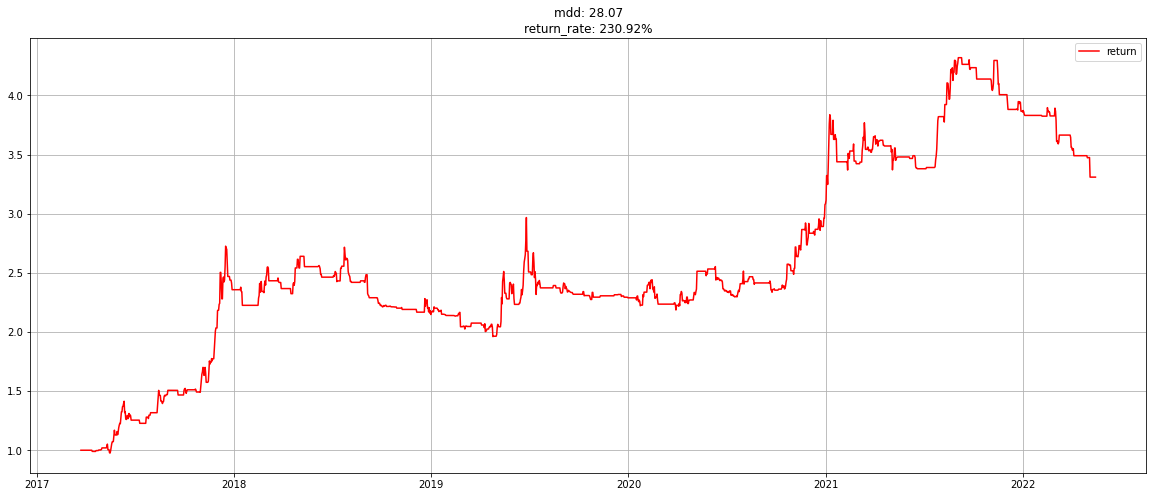

{'trade_rate': ' 15.07%', 'success_rate': ' 45.45%', 'pnl_rate': ' 0.28', 'mdd': ' 3.16%', 'cr': '-4.65%'}
{'trade_rate': ' 20.99%', 'success_rate': ' 23.53%', 'pnl_rate': ' 0.28', 'mdd': ' 4.54%', 'cr': '-6.72%'}
{'trade_rate': ' 51.01%', 'success_rate': ' 59.21%', 'pnl_rate': ' 1.20', 'mdd': ' 21.91%', 'cr': ' 11.95%'}
{'trade_rate': ' 49.48%', 'success_rate': ' 56.84%', 'pnl_rate': ' 1.70', 'mdd': ' 12.19%', 'cr': ' 51.55%'}


{'trade_rate': ' 36.91%',
 'success_rate': ' 52.02%',
 'pnl_rate': ' 1.30',
 'mdd': ' 28.07%',
 'cr': ' 230.92%'}

In [58]:
result_ma_noise_rsi = backtest_ma_and_rsi_and_noise(day50, df)
plot_return(result_ma_noise_rsi)

print(get_result_loss_1(result_ma_noise_rsi))
print(get_result_loss_2(result_ma_noise_rsi))
print(get_result_profit_1(result_ma_noise_rsi))
print(get_result_profit_2(result_ma_noise_rsi))
analysis_return(result_ma_noise_rsi)

In [59]:
# from function import plot_result_save
# plot_result_save.plot_result(day100)